Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [18]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

## I. Wrangle Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.0f}'.format

In [53]:
def wrangle(filepath):
    df = pd.read_csv(filepath, 
                     parse_dates=['created'])
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    # We need to drop a few columns and clean up the dataframe based on 
    # Too high or too low cardinality
    # Also taking out categorical variable

    df.drop(columns = ['display_address', 'street_address', 'interest_level',
                       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
                       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
                       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space', 'dining_room',
                       'high_speed_internet', 'balcony', 'swimming_pool', 'new_construction', 'terrace', 
                       'exclusive', 'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space'], inplace= True)


    return df

pd.options.display.float_format = '{:,.0f}'.format

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [54]:
df = wrangle(filepath)

df.head()

,bathrooms,bedrooms,created,description,latitude,longitude,price
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,41,-74,3000
1,1,2,2016-06-12 12:19:27,,41,-74,5465
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",41,-74,2850
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,41,-74,3275
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,41,-74,3350


**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   bathrooms    48817 non-null  float64       
 1   bedrooms     48817 non-null  int64         
 2   created      48817 non-null  datetime64[ns]
 3   description  47392 non-null  object        
 4   latitude     48817 non-null  float64       
 5   longitude    48817 non-null  float64       
 6   price        48817 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 3.0+ MB


In [37]:
# Look to see what data types are used.  It may be important to make created into a datetime format
df.dtypes

bathrooms      float64
bedrooms         int64
created         object
description     object
latitude       float64
longitude      float64
price            int64
dtype: object

In [38]:
# Unique value counts may be important in looking for what type of variables exist and Cardinality
df.nunique()

bathrooms         11
bedrooms           9
created        48148
description    37853
latitude        2265
longitude       1605
price           2685
dtype: int64

In [40]:
# Check for null values and look to see if there are any 0.0 values that are non-entrys
df.isna().sum()

bathrooms         0
bedrooms          0
created           0
description    1425
latitude          0
longitude         0
price             0
dtype: int64

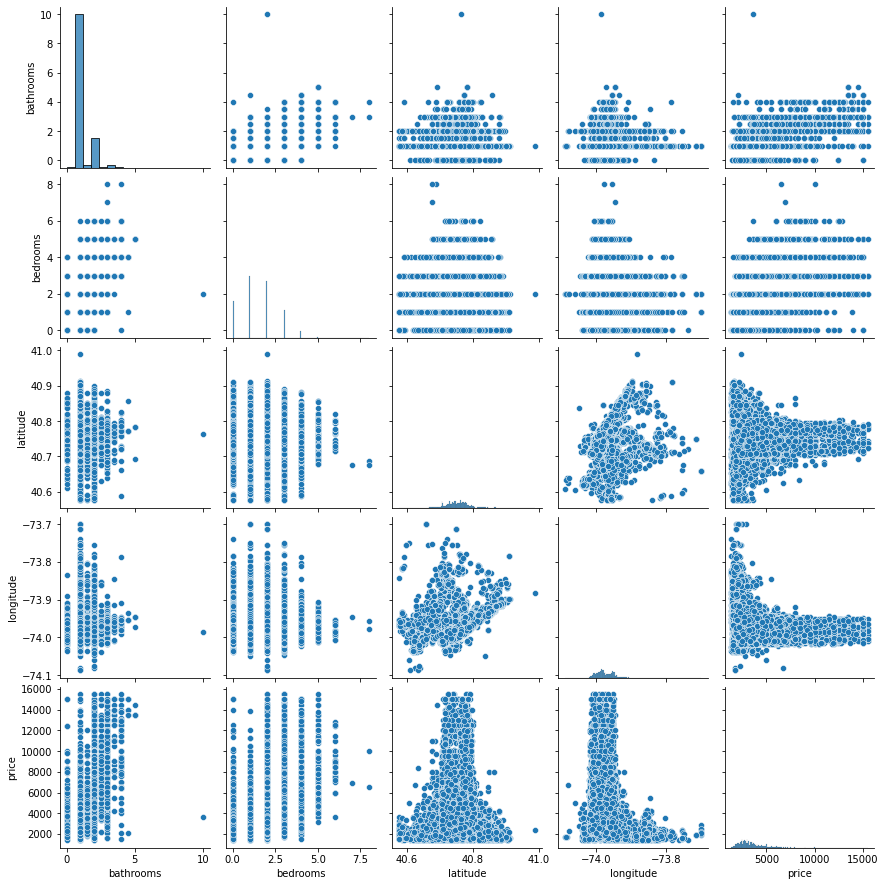

In [41]:
sns.pairplot(df)

In [56]:
df['price'].describe()

count   48,817
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your feature matrix must be one-dimensional.

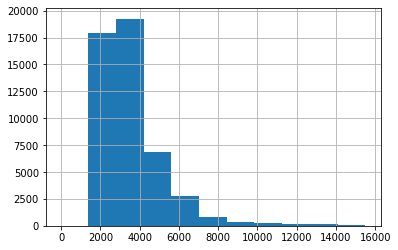

In [81]:
df['price'].hist()
df['bedrooms'].hist()

In [82]:
X = df[['bedrooms']]
y = df['price']

print(X.shape)
print(y.shape)

(48817, 1)
(48817,)


# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [83]:
from sklearn.metrics import mean_absolute_error

y_pred = [y.mean()]*len(y)

baseline_mae = mean_absolute_error(y, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1201.532252154329


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [84]:
# Step 1: Import predictor class

from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#dir(model)

model_slope = model.coef_
model_intercept = model.intercept_

print("The slope of the linear regression model is:", model_slope)
print("The y-intercept of the linear regression model is:", model_intercept)

The slope of the linear regression model is: [853.26640848]
The y-intercept of the linear regression model is: 2267.987688178934


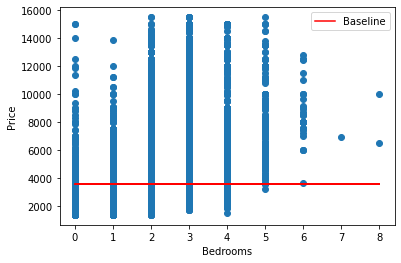

In [87]:
plt.scatter(X, y)
plt.plot(X, y_pred, label = 'Baseline', color= 'red')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [88]:
print(baseline_mae)

1201.532252154329


In [90]:
# Call the predict function on your model to find the linear regression equation
y_pred_lr = model.predict(X)

# Check the first 20 entries in the Array
y_pred_lr[:20]

array([4827.78691363, 3974.52050515, 3121.25409666, 3121.25409666,
       5681.05332211, 5681.05332211, 3974.52050515, 3121.25409666,
       3121.25409666, 5681.05332211, 2267.98768818, 3121.25409666,
       3974.52050515, 3974.52050515, 3121.25409666, 2267.98768818,
       3974.52050515, 3121.25409666, 5681.05332211, 3121.25409666])

In [91]:
training_mae = mean_absolute_error(y, y_pred_lr)

print('Training MAE:', training_mae)

Training MAE: 975.6496767374764


# VI. Communicate Results 

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using? 

**Task 7:** Print out the intercept and coefficient associated with `model`.

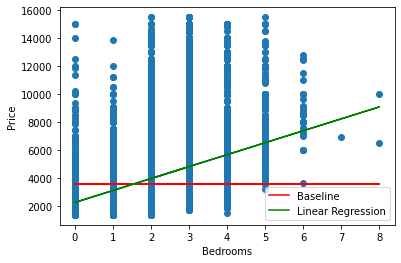

In [92]:
# This was done above in task 6 
# Will show plot and final Linear Regression equation below

plt.scatter(X, y)
plt.plot(X, y_pred, label= 'Baseline', color = 'red')
plt.plot(X, y_pred_lr, label= 'Linear Regression', color = 'green')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()

The equation for the Linear Regression is below:


$$\hat{y} = 2267.99 + 853.27X$$ 

This shows us that there is a slightly positive relationship with the number of bedrooms and base price. This is not a great representation of a Linear Regression model, but will work for this example. 